In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
import time
import scipy.stats as stats
import scipy.optimize as opt
import scipy.integrate as intgr
import scipy.linalg as la
from scipy import sparse

# Differentiation Problem Set

Problem 1

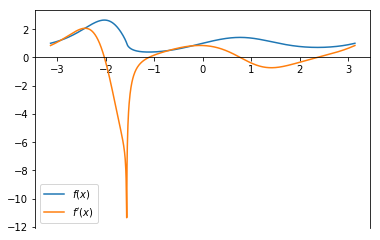

In [2]:
def function_diff():
    x = sy.symbols('x')
    fx = (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_primex = sy.diff(fx, x)
    f_primex1 = sy.lambdify(x, f_primex, "numpy")
    fx = sy.lambdify(x, fx, "numpy")
    return fx, f_primex1

fx, f_primex1= function_diff()
x = np.linspace(-np.pi, np.pi, 1000)
f_x = fx(x)
f_prime =f_primex1(x)
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
plt.plot(x, f_x, label = '$f(x)$')
plt.plot(x, f_prime, label = '$f^\prime(x)$')
plt.legend()
plt.show()




Problem 2

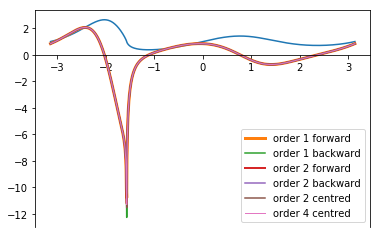

In [3]:
def finite_diff(x, h):
    forward_1 = (f(x+h) - f(x))/h
    forward_2 = (-3*f(x)+ 4*f(x+h) - f(x+2*h))/(2*h)
    backward_1 = (f(x) - f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+ f(x-2*h))/(2*h)
    centred_2 = (f(x+h) - f(x-h))/(2*h)
    centred_4 = (f(x-2*h) - 8*f(x-h)+8*f(x+h) - f(x+2*h))/(12*h)
    return forward_1, forward_2, backward_1, backward_2, centred_2, centred_4    

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

x = np.linspace(-np.pi, np.pi, 1000)
forward_1, forward_2, backward_1, backward_2, centred_2, centred_4 = finite_diff(x, 1e-3)
plt.plot(x, f(x))
plt.plot(x,forward_1, linewidth=3, label = 'order 1 forward')
plt.plot(x, backward_1, label = 'order 1 backward')
plt.plot(x, forward_2, linewidth =2, label='order 2 forward')
plt.plot(x, backward_2 , label = 'order 2 backward')
plt.plot(x, centred_2, label = 'order 2 centred')
plt.plot(x, centred_4, linewidth = 1, label= 'order 4 centred')
plt.legend()
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
plt.show()



Problem 3

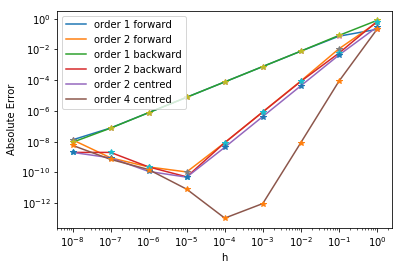

In [5]:
def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

def exact_deriv():
    x = sy.symbols('x')
    fx = (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_primex = sy.diff(fx, x)
    f_primex1 = sy.lambdify(x, f_primex, "numpy")
    fx = sy.lambdify(x, fx, "numpy")
    return fx, f_primex1

def approx_deriv(x, h):
    forward_1 = (f(x+h) - f(x))/h
    forward_2 = (-3*f(x)+ 4*f(x+h) - f(x+2*h))/(2*h)
    backward_1 = (f(x) - f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+ f(x-2*h))/(2*h)
    centred_2 = (f(x+h) - f(x-h))/(2*h)
    centred_4 = (f(x-2*h) - 8*f(x-h)+8*f(x+h) - f(x+2*h))/(12*h)
    return forward_1, forward_2, backward_1, backward_2, centred_2, centred_4

h = np.logspace(-8, 0, 9)
x = 1.0
fx, f_primex1 = exact_deriv()
exact = f_primex1(1)
forward_1, forward_2, backward_1, backward_2, centred_2, centred_4 = approx_deriv(1,h)
error_vec = np.array([np.abs(forward_1- exact), np.abs(forward_2 - exact), np.abs(backward_1- exact),
                    np.abs(backward_2- exact), np.abs(centred_2- exact), np.abs(centred_4- exact)])

plt.plot(h, error_vec[0], label='order 1 forward')
plt.plot(h, error_vec[1], label = 'order 2 forward')
plt.plot(h, error_vec[2], label= 'order 1 backward')
plt.plot(h, error_vec[3], label = 'order 2 backward')
plt.plot(h, error_vec[4], label = 'order 2 centred')
plt.plot(h, error_vec[5], label = 'order 4 centred')
plt.plot(h, error_vec[0], '*')
plt.plot(h, error_vec[1], '*')
plt.plot(h, error_vec[2], '*')
plt.plot(h, error_vec[3], '*')
plt.plot(h, error_vec[4], '*')
plt.plot(h, error_vec[5], '*')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.show()

Problem 4

In [7]:
data = np.load('plane.npy')
t = data[:,0]
alpha = data[:,1]
beta = data[:,2]
alpha_deg = np.deg2rad(alpha)
beta_deg = np.deg2rad(beta)

a =500
x_t = a*(np.tan(beta_deg)/(np.tan(beta_deg) - np.tan(alpha_deg)))
y_t = a*((np.tan(beta_deg)*np.tan(alpha_deg))/(np.tan(beta_deg) - np.tan(alpha_deg)))

x_prime = np.zeros(len(x_t))
y_prime = np.zeros(len(y_t))

for i in range(1,7):
    x_prime[i] = (x_t[i+1] - x_t[i-1])/2
    y_prime[i] = (y_t[i+1] - y_t[i-1])/2
x_prime[0] = x_t[1] - x_t[0]
y_prime[0] = y_t[1] - y_t[0]
x_prime[-1] = (x_t[-1] - x_t[-2])
y_prime[-1] = (y_t[-1] - y_t[-2])

speed = (((x_prime)**2) + ((y_prime)**2))**(1/2)
print('speed in m/sec for time t=7 to t=14 is: ', speed)

speed in m/sec for time t=7 to t=14 is:  [46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


Problem 5

In [8]:
def f(xvec):
    f_1 = xvec[0]**2
    f_2 = xvec[0]**3 - xvec[1]
    f = (f_1, f_2)
    return f

def jacobian(xvec, h):
    dim_x = len(xvec)
    dim_y = len(f(xvec))
    jacobian = np.empty((dim_y, dim_x))
    basis_matrix = np.identity(dim_x)
    for i in range(dim_y):
        for j in range(dim_x):
            e_j = basis_matrix[:,j]
            jacobian[i,j] = (f(xvec+h*e_j)[i]- f(xvec-h*e_j)[i])/(2*h)
    return jacobian


xvec = (1,3)
jacobian(xvec, 1e-3)

array([[ 2.      ,  0.      ],
       [ 3.000001, -1.      ]])

Problem 6

Problem 7

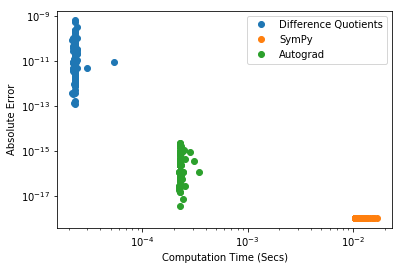

In [12]:
def prob7(N):
    #Exact Derivative
    exact = np.zeros(N)
    x = np.zeros(N)
    exact_comptime = np.zeros(N)
    for i in range(N):
        x[i] = np.random.uniform(-10,10)
    for i in range(N):
        start_exact = time.time()
        fx, f_primex1 = exact_diff()
        exact[i] = f_primex1(x[i])
        end_exact = time.time()
        exact_comptime[i] = end_exact - start_exact
    #Approx Derviative
    approx_comptime = np.zeros(N)
    approx = np.zeros(N)
    for i in range(N):
        start_approx= time.time()
        approx[i] = approx_deriv(x[i], 1e-5)
        end_approx = time.time()
        approx_comptime[i] = end_approx- start_approx
    absolute_error = np.abs(approx-exact)
    #Autograd Derivative
    auto_comptime= np.zeros(N)
    auto = np.zeros(N)
    for i in range(N):
        start_auto = time.time()
        g = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
        dg = grad(g)
        auto[i] = dg(x[i])
        end_auto = time.time()
        auto_comptime[i] = end_auto - start_auto
    auto_error= np.abs(auto - exact)
    return absolute_error, auto_error, exact_comptime, approx_comptime, auto_comptime

def exact_diff():
    x = sy.symbols('x')
    fx = (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_primex = sy.diff(fx, x)
    f_primex1 = sy.lambdify(x, f_primex, "numpy")
    fx = sy.lambdify(x, fx, "numpy")
    return fx, f_primex1

def approx_deriv(x, h):
    centred_4 = (f(x-2*h) - 8*f(x-h)+8*f(x+h) - f(x+2*h))/(12*h)
    return centred_4

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

absolute_error, auto_error, exact_comptime, approx_comptime, auto_comptime= prob7(200)
exact_error = np.ones(200)*(1e-18)
plt.plot(approx_comptime, absolute_error, 'o', label = 'Difference Quotients')
plt.plot(exact_comptime, exact_error, 'o', label = 'SymPy')
plt.plot(auto_comptime,auto_error, 'o', label = 'Autograd')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Computation Time (Secs)')
plt.ylabel('Absolute Error')
plt.show()

